The following data comes from [Anime Dataset 2023](https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset/data?select=users-details-2023.csv) on Kaggle.

We will be looking at two main datasets: `users-details-2023.csv` and `anime-dataset-2023.csv`.

The first dataset, `users-details-2023.csv`, contains information on over 730,000 users registered in MyAnimeList, which is a website designed for users to catalogue and track anime episodes that they have watched or plan to watch. (It is very similar to other social cataloguing websites like Goodreads or Letterboxd; MyAnimeList is just specifically designed for anime enthusiasts.) Details collected about these users in this dataset include their gender, birthdate, location, their account creation date, the number of anime series they have completed, the number they are currently watching, and even the number of total days they have spent watching anime.

The second dataset, `anime-dataset-2023.csv`, contains information on the anime themselves, including their genre, air dates, and number of episodes.

### Questions to answer
- What is the gender makeup of the average MyAnimeList user?
- How has the nature of anime episodes changed over time? Are certain genres more popular in recent years than in others?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
# Load datasets
user_details = pd.read_csv('users-details-2023.csv')
anime_df = pd.read_csv('anime-dataset-2023.csv')

### User details

In [3]:
# Look at user_details head
user_details.head()

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0


In [4]:
user_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731290 entries, 0 to 731289
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Mal ID            731290 non-null  int64  
 1   Username          731289 non-null  object 
 2   Gender            224383 non-null  object 
 3   Birthday          168068 non-null  object 
 4   Location          152805 non-null  object 
 5   Joined            731290 non-null  object 
 6   Days Watched      731282 non-null  float64
 7   Mean Score        731282 non-null  float64
 8   Watching          731282 non-null  float64
 9   Completed         731282 non-null  float64
 10  On Hold           731282 non-null  float64
 11  Dropped           731282 non-null  float64
 12  Plan to Watch     731282 non-null  float64
 13  Total Entries     731282 non-null  float64
 14  Rewatched         731282 non-null  float64
 15  Episodes Watched  731282 non-null  float64
dtypes: float64(10), int6

---

Let's answer our first question:
- What is the gender makeup of the average MyAnimeList user?

In [5]:
female_count = user_details[user_details['Gender']=='Female'].shape[0]
male_count = user_details[user_details['Gender']=='Male'].shape[0]
nb_count = user_details[user_details['Gender']=='Non-Binary'].shape[0]
gender_total = user_details['Gender'].count()

In [6]:
print(f"Out of {gender_total} total users who provided a gender in their profile:")
print(f"Percentage female: {female_count/gender_total*100:.2f}%")
print(f"Percentage male: {male_count/gender_total*100:.2f}%")
print(f"Percentage non-binary: {nb_count/gender_total*100:.2f}%")

Out of 224383 total users who provided a gender in their profile:
Percentage female: 43.00%
Percentage male: 56.59%
Percentage non-binary: 0.41%


Perhaps unsurprisingly, the majority of users on MyAnimeList are male.

Here this is represented as a pie chart:

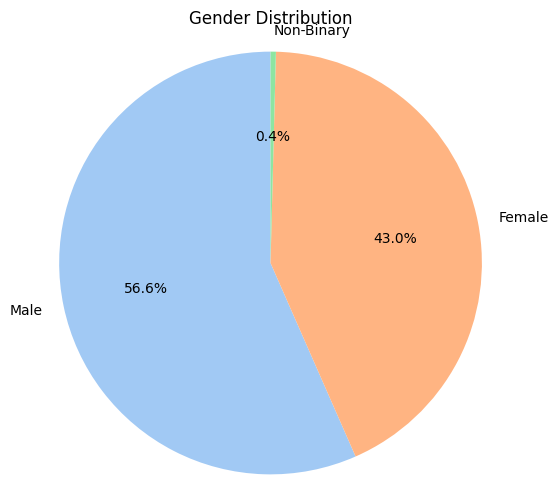

In [7]:
# Count the number of each gender category
gender_counts = user_details['Gender'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Gender Distribution')
plt.axis('equal')  # Ensures the pie chart is a circle.
plt.show()

Here this is represented as a bar chart:

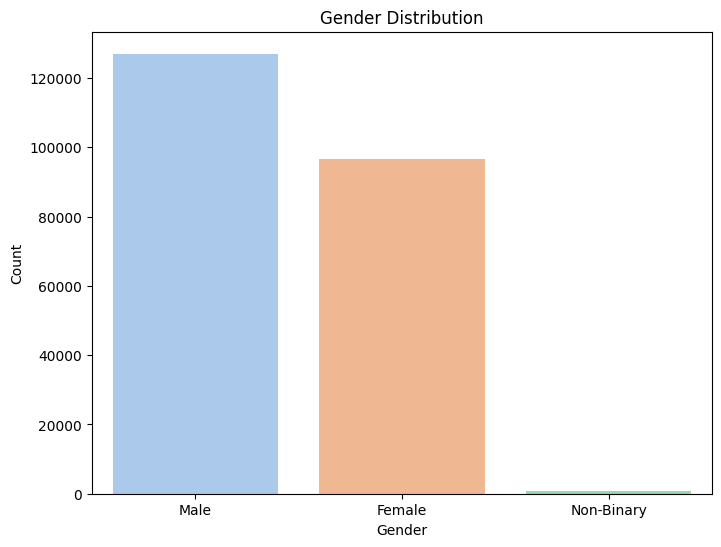

In [8]:
# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

---
Let's answer our second question:
- How has the nature of anime episodes changed over time? Are certain genres more popular in recent years than in others?

In [9]:
# Look at the head of our anime dataframe.
anime_df.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [10]:
# Let's drop the "Other name" column, which contains the title of the anime in its original language.
anime_df = anime_df.drop(['Other name', 'Image URL'], axis=1)

In [11]:
anime_df.head()

,anime_id,Name,English name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,...,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members
0,1,Cowboy Bebop,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,...,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,...,Sony Pictures Entertainment,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978
2,6,Trigun,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,...,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252
3,7,Witch Hunter Robin,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,...,"Funimation, Bandai Entertainment",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931
4,8,Bouken Ou Beet,Beet the Vandel Buster,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,...,Illumitoon Entertainment,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001


In [12]:
anime_df.columns

Index(['anime_id', 'Name', 'English name', 'Score', 'Genres', 'Synopsis',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Status', 'Producers',
       'Licensors', 'Studios', 'Source', 'Duration', 'Rating', 'Rank',
       'Popularity', 'Favorites', 'Scored By', 'Members'],
      dtype='object')

In [13]:
for col in anime_df.columns:
    print(f"{col}:")
    print(anime_df[col].unique())
    print("---")

anime_id:
[    1     5     6 ... 55733 55734 55735]
---
Name:
['Cowboy Bebop' 'Cowboy Bebop: Tengoku no Tobira' 'Trigun' ...
 'Di Yi Xulie' 'Bokura no Saishuu Sensou' 'Shijuuku Nichi']
---
English name:
['Cowboy Bebop' 'Cowboy Bebop: The Movie' 'Trigun' ...
 'A Dream Where You Dreamt of Me' 'Blader Soul' 'The First Order']
---
Score:
['8.75' '8.38' '8.22' '7.25' '6.94' '7.92' '8.0' '7.55' '8.16' '8.87'
 '7.99' '8.69' '7.86' '6.39' '7.89' '7.38' '7.76' '7.29' '7.91' '7.48'
 '8.35' '7.46' '8.55' '8.56' '8.27' '8.71' '8.29' '6.95' '7.32' '6.27'
 '7.26' '7.11' '7.06' '6.51' '5.86' '7.03' '7.4' '7.62' '7.17' '6.72'
 '6.56' '7.41' '7.33' '6.31' '7.61' '8.03' '7.93' '7.64' '7.97' '8.01'
 '7.96' '6.76' '7.24' '7.9' '6.68' '7.66' '6.62' '6.77' '7.69' '7.74'
 '7.34' '7.75' '7.18' '7.57' '7.79' '7.42' '7.28' '7.16' '7.44' '7.49'
 '6.4' '7.19' '6.79' '7.58' '6.97' '4.82' '7.37' '6.93' '6.78' '6.52'
 '8.11' '7.94' '6.82' '6.44' '6.86' '6.92' '6.74' '6.15' '7.39' '8.08'
 '8.41' '8.31' '8.18' '8.25' 

In [14]:
# Will need to change the duration column and premiered column to datetime format

In [15]:
# Might also be interesting to do cosine similarity analysis on anime descriptions

In [16]:
# Time series plots of air dates and genres

In [17]:
# Maybe do get_dummies on the genres

In [18]:
def extract_years(aired_str):
    # Split the string by ' to '
    parts = aired_str.split(' to ')
    
    # Define date formats
    formats = ['%b %d, %Y', '%b %Y']  # Include formats for both complete and partial dates

    def try_parsing_date(date_str):
        for fmt in formats:
            try:
                return datetime.strptime(date_str, fmt)
            except ValueError:
                continue
        return None

    if len(parts) == 2:
        start_date, end_date = parts
        start_date = try_parsing_date(start_date)
        end_date = try_parsing_date(end_date) if end_date != '?' else None
    elif len(parts) == 1:
        start_date = try_parsing_date(parts[0])
        end_date = None
    else:
        start_date = end_date = None
    
    # Extract the year from datetime objects
    start_year = start_date.year if start_date else None
    end_year = end_date.year if end_date else None
    
    return start_year, end_year

# Apply the function to the 'Aired' column
anime_df[['Aired_Start_Year', 'Aired_End_Year']] = anime_df['Aired'].apply(lambda x: pd.Series(extract_years(x)))

# Display the updated DataFrame
print(anime_df[['Aired', 'Aired_Start_Year', 'Aired_End_Year']].head())

                          Aired  Aired_Start_Year  Aired_End_Year
0   Apr 3, 1998 to Apr 24, 1999            1998.0          1999.0
1                   Sep 1, 2001            2001.0             NaN
2   Apr 1, 1998 to Sep 30, 1998            1998.0          1998.0
3   Jul 3, 2002 to Dec 25, 2002            2002.0          2002.0
4  Sep 30, 2004 to Sep 29, 2005            2004.0          2005.0


In [19]:
anime_df['Genres'].unique()

array(['Action, Award Winning, Sci-Fi', 'Action, Sci-Fi',
       'Action, Adventure, Sci-Fi', ..., 'Girls Love, Sci-Fi',
       'Action, Comedy, Drama, Fantasy, Romance, Ecchi',
       'Action, Adventure, Fantasy, Horror'], dtype=object)

In [20]:
# Split the 'Genres' column by commas and create a list of all genres
all_genres = anime_df['Genres'].str.split(', ').explode()
all_genres.unique()

array(['Action', 'Award Winning', 'Sci-Fi', 'Adventure', 'Drama',
       'Mystery', 'Supernatural', 'Fantasy', 'Sports', 'Comedy',
       'Romance', 'Slice of Life', 'Suspense', 'Ecchi', 'Gourmet',
       'Avant Garde', 'Horror', 'Girls Love', 'Boys Love', 'Hentai',
       'UNKNOWN', 'Erotica'], dtype=object)

In [21]:
# Split the 'Genres' column by commas
anime_df['Genres'] = anime_df['Genres'].str.split(', ')

# Use pd.get_dummies with the 'Genres' column
# First, explode the genres so each genre has its own row
anime_genres_exploded = anime_df.explode('Genres')

# Create dummy variables for the genres
genre_dummies = pd.get_dummies(anime_genres_exploded['Genres'])

# Combine the dummy variables back with the original DataFrame
anime_df_with_dummies = pd.concat([anime_df, genre_dummies], axis=1)

# Optionally, you can drop the original 'Genres' column if not needed
anime_df_with_dummies = anime_df_with_dummies.drop(columns=['Genres'])

anime_df_with_dummies.head()

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,...,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,UNKNOWN
0,1,Cowboy Bebop,Cowboy Bebop,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,...,False,False,False,False,False,False,False,False,False,False
0,1,Cowboy Bebop,Cowboy Bebop,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,...,False,False,False,False,False,False,False,False,False,False
0,1,Cowboy Bebop,Cowboy Bebop,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,...,False,False,False,False,True,False,False,False,False,False
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,8.38,"Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,...,False,False,False,False,False,False,False,False,False,False
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,8.38,"Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,...,False,False,False,False,True,False,False,False,False,False


In [22]:
# Define a list of genres considered "adult"
adult_genres = ['Ecchi', 'Hentai', 'Erotica', 'Boys Love', 'Girls Love']

# Create a new column 'Adult' and set it to 1 if any of the adult genres are present, else 0
anime_df['Adult'] = anime_df['Genres'].apply(lambda genres: 1 if any(genre in adult_genres for genre in genres) else 0)

# Optional: If you want to remove the individual adult genre columns after grouping, you can drop them:
anime_df_with_dummies = anime_df_with_dummies.drop(columns=adult_genres)

In [23]:
anime_df_with_dummies

,anime_id,Name,English name,Score,Synopsis,Type,Episodes,Aired,Premiered,Status,...,Gourmet,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,UNKNOWN
0,1,Cowboy Bebop,Cowboy Bebop,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,...,False,False,False,False,False,False,False,False,False,False
0,1,Cowboy Bebop,Cowboy Bebop,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,...,False,False,False,False,False,False,False,False,False,False
0,1,Cowboy Bebop,Cowboy Bebop,8.75,"Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,...,False,False,False,False,True,False,False,False,False,False
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,8.38,"Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,...,False,False,False,False,False,False,False,False,False,False
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,8.38,"Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24902,55733,Di Yi Xulie,The First Order,UNKNOWN,No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",UNKNOWN,Finished Airing,...,False,False,False,False,False,False,False,False,False,False
24902,55733,Di Yi Xulie,The First Order,UNKNOWN,No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",UNKNOWN,Finished Airing,...,False,False,False,False,False,False,False,False,False,False
24902,55733,Di Yi Xulie,The First Order,UNKNOWN,No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",UNKNOWN,Finished Airing,...,False,False,False,False,True,False,False,False,False,False
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",UNKNOWN,Finished Airing,...,False,False,False,False,False,False,False,False,False,True
